# Analyse accuracy of Schroedinger-schemes

In [1]:
from IPython.display import display, Markdown, Latex
%run schroedinger_test_suite.py

In [5]:
scheme_list.keys()

dict_keys(['wave-ftcs (forward in time, centered in space)', 'wave-crank-nicolson', 'wave-spectral', 'phase-upwind', 'phase-upwind with friction', 'phase-upwind without quantum pressure', 'phase-upwind without convection', 'phase-ho-upwind', 'phase-ho-upwind with friction', 'phase-ho-upwind without diffusion', 'phase-ho-upwind without convection', 'phase-vho-upwind', 'phase-lw-upwind', 'phase-ftcs-convective', 'phase-ftcs-convective without diffusion', 'phase-ftcs-convective without convection', 'phase-ftcs-convective without source', 'fluid-muscl-hancock'])

In [6]:
test_list.keys()

dict_keys(['standing wave', 'harmonic oscillator convergence', 'harmonic oscillator eigenstate', 'harmonic oscillator coherent state', 'infinite well', 'gaussian wave packet', 'hubble expansion', 'wide hubble expansion', 'quasi-shock', 'wave packet collision', 'travelling wave packet', 'perturbation wave', 'stability test', 'soliton', 'expanding_soliton', 'perturbation wave 2D', 'soliton 2D'])

#1D plots

##Test: accuracy test

###Mode: spatial and temporal accuracy

tEnd 1.2732395447351628
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.125  dt  0.0001
error [i]:  0 0.021917397198627994
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.0625  dt  2.5e-05
error [i]:  1 0.03906965444089027
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.03125  dt  6.25e-06
error [i]:  2 0.007305560149951023
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.015625  dt  1.5625e-06
error [i]:  3 0.0015202803099337373
tEnd 1.2732395447351628
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.125  dt  0.0001
error [i]:  0 0.03399030622594924
Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
dx  0.0625  dt  2.5e-05
error [i]:  1 0.027586131266346806
Constructing scheme
Setting up grid
Reading in initial c

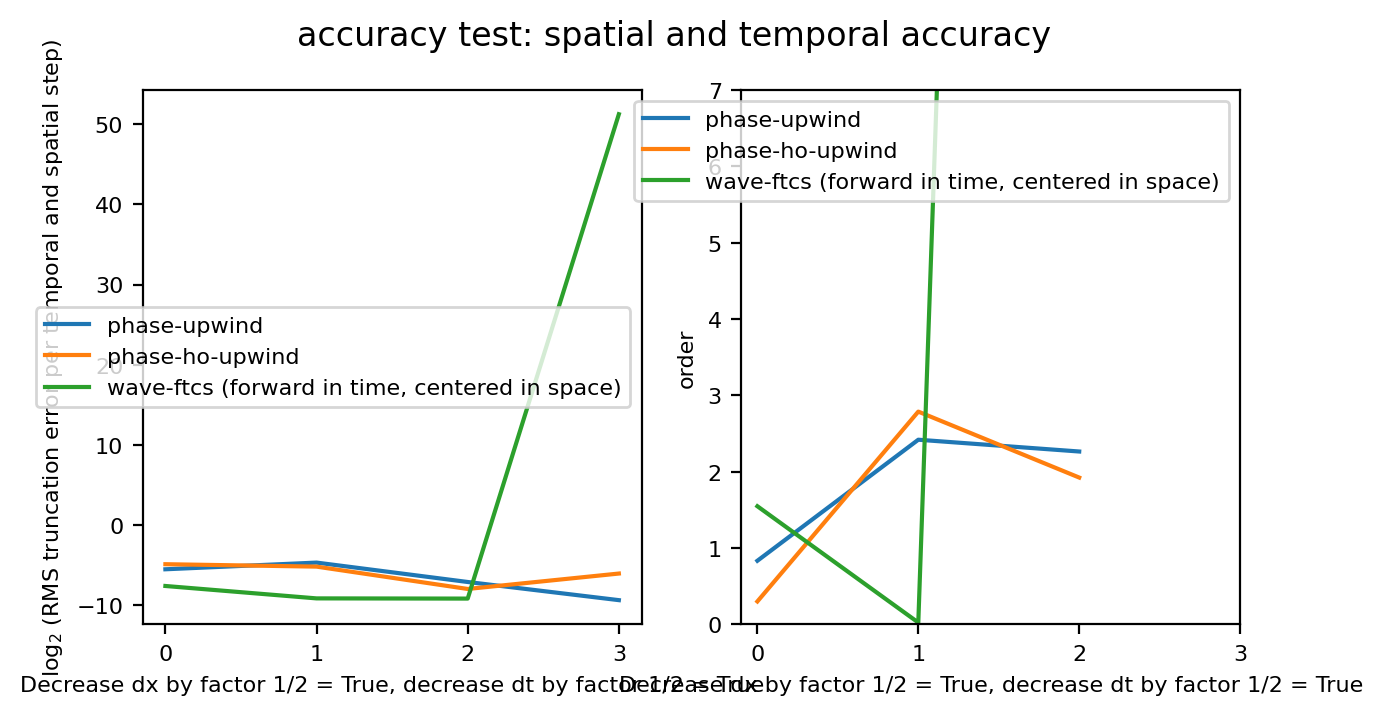

<Figure size 432x288 with 0 Axes>

In [2]:
N = 2
dimensions = [1]
test_names_1d  = ['accuracy test']
test_names_2d  = ['accuracy test 2d']
test_names_3d  = ['perturbation wave 3D']

schemes_for_accuracy_test = ["phase-upwind", "phase-ho-upwind", "wave-ftcs (forward in time, centered in space)"]
mode_list = ["stencilOrder"]
mode_names = ["spatial and temporal accuracy"]

for dimension in dimensions:
    display(Markdown('# ' + str(dimension) + "D plots"))

    if dimension == 1:
        test_names = test_names_1d
    elif dimension == 2: 
        test_names = test_names_2d
    elif dimension == 3: 
        test_names = test_names_3d

    for test_name in test_names:
        test, testConfig, potential = test_list[test_name]



        for mode_name, mode in zip(mode_names, mode_list):

            display(Markdown('##' + " Test: " + test_name))
            display(Markdown('###'  + " Mode: " + mode_name))

            truncations_errors = {}


            halfDT = False 
            halfDX = False

            if mode_name == "spatial accuracy":
                halfDX = True
            elif mode_name == "temporal accuracy":
                halfDT = True
            else:
                halfDX = True 
                halfDT = True


            for scheme_name in schemes_for_accuracy_test:
                scheme, schemeConfig = scheme_list[scheme_name]

                c = getBaseConfig()
                testConfig(c)
                schemeConfig(c)

                p = analysis.analyseError(
                    scheme,
                    c,
                    test,
                    test,
                    N=N,
                    halfDT=halfDT,
                    halfDX=halfDX,
                    debug=True,
                    chopBoundary=False,
                    waveScheme=None#wave_schemes.SpectralScheme
                )

                truncations_errors[scheme_name] = p

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.54 * 2, 3.54), dpi = 200)
            plt.suptitle(test_name + ": " + mode_name)
            xx = np.arange(N)

            for key, value in truncations_errors.items():
                error = np.log(value)/np.log(2)
                ax1.plot(xx, error, label=key)
                order = np.roll(error, -1) - error
                ax2.plot(xx[:-1], np.abs(order[:-1]), label=key)
            ax1.legend()

            ax1.set_xlabel(
                f"Decrease dx by factor 1/2 = {halfDX}, decrease dt by factor 1/2 = {halfDT}"
            )

            ax1.set_ylabel(r"$\log_2$ (RMS truncation error per temporal and spatial step)")
            ax1.set_xticks(np.arange(N))
            ax1.set_xticklabels(np.arange(N))


            ax2.set_xlabel(
                f"Decrease dx by factor 1/2 = {halfDX}, decrease dt by factor 1/2 = {halfDT}"
            )

            ax2.set_ylabel(r"order")
            ax2.set_xticks(np.arange(N))
            ax2.set_xticklabels(np.arange(N))
            ax2.set_yticks(np.arange(8))
            ax2.set_yticklabels(np.arange(8))
            ax2.set_ylim(0, 7)
            ax2.legend()
            
            filename = str(dimension) + "d_" + mode_name + "_" + test_name
            filename = filename.replace(" ", "_")
            plt.show() 
            plt.clf()

            np.savez("data/" + filename  + ".npz", **truncations_errors)
